In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = dataset.iloc[:,[3,4]] #We are interested in the Income and spending score

In [5]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
X = X.values #.values makes it an array instead of a dataframe

In [7]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

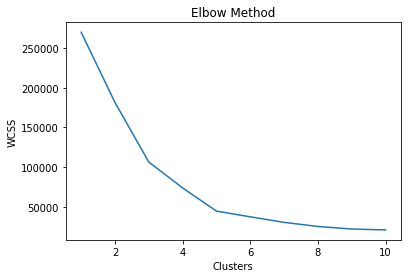

In [8]:
#Using the elbow method to find the optimal number of clusters
#We find the wcss for 10 clusters
wcss = [] #Within cluster sum of squares
for i in range(1,11):
    cluster = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    cluster.fit(X)
    wcss.append(cluster.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#From the above, it shows that the optimal number of cluster is 5

In [9]:
#Fit the model to our columns
cluster = KMeans(n_clusters = 5, init ='k-means++', max_iter = 300, n_init = 10, random_state =0)
yclusters = cluster.fit_predict(X)

In [10]:
np.unique(yclusters) #We see that the clusters are from 0 to 4

array([0, 1, 2, 3, 4])

In [11]:
cluster.cluster_centers_
#These are the positions of the clusters centroids

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

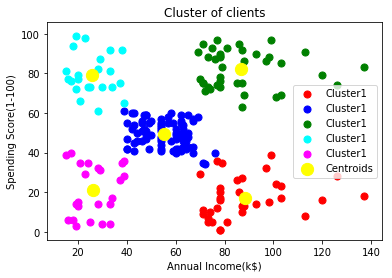

In [12]:
#Visualize the clusters
plt.scatter(X[yclusters==0, 0], X[yclusters==0, 1], s = 50, c ='red', label = 'Cluster1')
plt.scatter(X[yclusters==1, 0], X[yclusters==1, 1], s = 50, c ='blue', label = 'Cluster1')
plt.scatter(X[yclusters==2, 0], X[yclusters==2, 1], s = 50, c ='green', label = 'Cluster1')
plt.scatter(X[yclusters==3, 0], X[yclusters==3, 1], s = 50, c ='cyan', label = 'Cluster1')
plt.scatter(X[yclusters==4, 0], X[yclusters==4, 1], s = 50, c ='magenta', label = 'Cluster1')
plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], c = 'yellow', s=150, label = 'Centroids')
plt.title('Cluster of clients')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

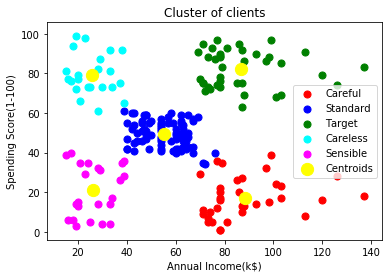

In [13]:
#Give the clusters a proper name
plt.scatter(X[yclusters==0, 0], X[yclusters==0, 1], s = 50, c ='red', label = 'Careful')
plt.scatter(X[yclusters==1, 0], X[yclusters==1, 1], s = 50, c ='blue', label = 'Standard')
plt.scatter(X[yclusters==2, 0], X[yclusters==2, 1], s = 50, c ='green', label = 'Target')
plt.scatter(X[yclusters==3, 0], X[yclusters==3, 1], s = 50, c ='cyan', label = 'Careless')
plt.scatter(X[yclusters==4, 0], X[yclusters==4, 1], s = 50, c ='magenta', label = 'Sensible')
plt.scatter(cluster.cluster_centers_[:,0], cluster.cluster_centers_[:,1], c = 'yellow', s=150, label = 'Centroids')
plt.title('Cluster of clients')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()